In [0]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing

In [2]:
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data=pd.read_csv('/content/drive/My Drive/ZS/data.csv', index_col = 0)
sample=pd.read_csv('/content/drive/My Drive/ZS/sample_submission.csv')

In [0]:
data_temp=data
data_main=data

In [5]:
len(sample)# 62.86

5000

In [0]:
from keras.models import Sequential
from keras import optimizers

from keras.layers import Dense, Activation
#Using Relu activation, and Adam optimizer, 50 epochs
def best_model(X_train,y_train,X_test,y_test,X_test_ZS):
  model = Sequential()
  model.add(Dense(12, input_dim=15 ,activation='relu'))
 # model.add(Dense(12,  activation='relu'))
  model.add(Dense(10,  activation='relu'))
  model.add(Dense(10,  activation='relu'))
  model.add(Dense(2,  activation='relu'))
  #model.add(Dense(2,  activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Activation('softmax'))
  #sgd = optimizers.SGD(lr=0.001, decay=1e-3)
  #model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])
  
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  # Train model
  history = model.fit(X_train, y_train, nb_epoch=10, batch_size=10,  verbose=1)
  # Print Accuracy
  scores = model.evaluate(X_test, y_test) 
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  #train:test=0.10 
  pred_new=model.predict(X_test_ZS)  
  return pred_new

In [0]:
pred=best_model(X_train,y_train,X_test,y_test,X_test_ZS)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_244 (Dense)            (None, 12)                192       
_________________________________________________________________
dense_245 (Dense)            (None, 10)                130       
_________________________________________________________________
dense_246 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_247 (Dense)            (None, 2)                 22        
_________________________________________________________________
dense_248 (Dense)            (None, 1)                 3         
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
24184/24184 [==============================] - 14s 598us/step - loss: 0.6752 - acc: 0.5900
Epoch 2/10
24184/24184 [==============================] - 11s 469us/step - loss: 0.6710 - acc: 0.5989
Epoch 3/10
24184/24184 [==============================] - 11s 475us/step - loss: 0.6700 - acc: 0.5988
Epoch 4/10
24184/24184 [==============================] - 11s 474us/step - loss: 0.6688 - acc: 0.5980
Epoch 5/10
24184/24184 [==============================] - 11s 468us/step - loss: 0.6676 - acc: 0.5983
Epoch 6/10
24184/24184 [==============================] - 11s 466us/step - loss: 0.6635 - acc: 0.5970
Epoch 7/10
24184/24184 [==============================] - 11s 466us/step - loss: 0.6606 - acc: 0.6001
Epoch 8/10
24184/24184 [==============================] - 11s 467us/step - loss: 0.6596 - acc: 0.6009
Epoch 9/10
24184/24184 [==============================] - 11s 467us/step - loss: 0.6592 - acc: 0.5999
Epoch 10/10
245/245 [==============================] - 1s 5ms/step
acc: 60.41%


In [0]:
pred_new=clf.predict(X_test_ZS)

# Visualize Data


In [0]:
data.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [0]:
from collections import Counter
def display(df):
  temp=Counter(df)
  print(temp)

In [0]:
len(data)

30697

In [0]:
display(data['distance_of_shot.1'].fillna(0))

Counter({20.0: 4232, 0.0: 1568, 45.0: 1511, 44.0: 1162, 37.0: 1125, 38.0: 1086, 36.0: 1036, 39.0: 1019, 46.0: 965, 40.0: 931, 35.0: 884, 34.0: 825, 33.0: 705, 41.0: 620, 32.0: 599, 31.0: 528, 27.0: 525, 42.0: 519, 30.0: 514, 28.0: 509, 21.0: 499, 26.0: 491, 29.0: 448, 22.0: 438, 43.0: 419, 47.0: 392, 25.0: 390, 23.0: 291, 24.0: 287, 48.0: 143, 55.4: 69, 49.0: 65, 64.4: 65, 16.4: 64, 90.4: 61, 88.4: 61, 108.4: 60, 72.4: 59, 68.4: 58, 62.4: 57, 21.4: 57, 24.4: 56, 70.4: 56, 38.4: 55, 83.4: 55, 43.4: 55, 73.4: 55, 75.4: 54, 67.4: 54, 84.4: 53, 57.4: 53, 77.4: 53, 96.4: 53, 9.4: 53, 102.4: 52, 37.4: 52, 19.4: 52, 61.4: 52, 69.4: 52, 32.4: 52, 17.4: 52, 87.4: 52, 82.4: 52, 58.4: 52, 104.4: 51, 47.4: 51, 94.4: 51, 59.4: 50, 74.4: 50, 81.4: 50, 30.4: 50, 34.4: 50, 28.4: 50, 25.4: 50, 56.4: 50, 41.4: 50, 105.4: 50, 78.4: 50, 95.4: 49, 51.4: 49, 107.4: 49, 52.4: 48, 63.4: 48, 15.4: 48, 79.4: 48, 99.4: 48, 14.4: 47, 85.4: 47, 93.4: 47, 26.4: 47, 18.4: 46, 50.4: 46, 36.4: 46, 100.4: 46, 92.4: 46,

In [0]:
def convert_to_cat(col,data):
  # Create a label (category) encoder object
  le = preprocessing.LabelEncoder()
  # Fit the encoder to the pandas column
  data[col] = data[col].astype('|S80') 
  le.fit(data[col])
  # View the labels (if you want)
  #print(list(le.classes_))
  # Apply the fitted encoder to the pandas column
  data[col]=(le.transform(data[col])).astype('float64')
  #print(data[col].head())
  #print('\n')
  # Convert some integers into their category names
  #list(le.inverse_transform([2, 2, 1]))
    

In [0]:
from sklearn import preprocessing
 
def preprocess(data):
  #shot=np.arange(1,30698)
  #data['shot_id_number']=shot
  l=[]
  for i in range(len(data)):
    if math.isnan(data['is_goal'].iloc[i]) :
        l.append(i)  
  dff=pd.DataFrame(columns=['home/away'])
  dff['home/away']=data['home/away']    
  dff=dff.fillna('')
  for i in range(len(dff)):
    if '@' in dff.iloc[i][0]:
      dff.iloc[i][0]=0
    elif 'vs' in dff.iloc[i][0]:
      dff.iloc[i][0]=1
    else:
      dff.iloc[i][0]=0
  dff['home/away'] = dff['home/away'].astype(np.float64)   
  data['home/away']=dff['home/away']
      
  df1=pd.DataFrame(columns=['type_of_shot','type_of_combined_shot'])
  df1['type_of_shot']=data['type_of_shot']
  df1['type_of_combined_shot']=data['type_of_combined_shot']
  df1['a+b'] = df1.fillna('').sum(axis=1)
  data['type_of_shot']=df1['a+b']
  data=data.drop(columns=['type_of_combined_shot'])
        
  train_data=data.drop(index=l)   
  train_data=train_data.drop(columns=['match_event_id','game_season','team_name','date_of_game','lat/lng','match_id','team_id','knockout_match','knockout_match.1'])


  cat=[]
  for i in train_data.columns:
    #print(i, "-->>> ",train_data[i].dtype)
    if(train_data[i].dtype=='object'):
      cat.append(i)
  #print('\n')    
  #cat
  print(cat)
  for col in cat:
    convert_to_cat(col,train_data)
  train_data=train_data.fillna(0)
  #print(train_data['type_of_shot'])
  X_df=train_data.drop(columns=['is_goal','shot_id_number'])
  X=X_df.as_matrix()
  Y=train_data['is_goal']
  X = preprocessing.scale(X)
  return X,Y

def preprocess_test(data,sample):
  shot=np.arange(1,30698)
  
  dfff=pd.DataFrame(columns=['home/away'])
  dfff['home/away']=data['home/away']    
  dfff=dfff.fillna('')
  for i in range(len(dfff)):
    if '@' in dfff.iloc[i][0]:
      dfff.iloc[i][0]=0
    elif 'vs' in dfff.iloc[i][0]:
      dfff.iloc[i][0]=1
    else:
      dfff.iloc[i][0]=0
  dfff['home/away'] = dfff['home/away'].astype(np.float64)   
  data['home/away']=dfff['home/away']
  
  
  data['shot_id_number']=shot
  df1=pd.DataFrame(columns=['type_of_shot','type_of_combined_shot'])
  df1['type_of_shot']=data['type_of_shot']
  df1['type_of_combined_shot']=data['type_of_combined_shot']
  df1['a+b'] = df1.fillna('').sum(axis=1)
  data['type_of_shot']=df1['a+b']
  data=data.drop(columns=['type_of_combined_shot'])  
  indexes=sample['shot_id_number']
  Test=data[data['shot_id_number'].isin(indexes)]
  print(len(Test))
  train_data=Test.drop(columns=['match_event_id','game_season','team_name','date_of_game','lat/lng','match_id','team_id','knockout_match','knockout_match.1'])
  
  cat=[]
  for i in train_data.columns:
    #print(i, "-->>> ",train_data[i].dtype)
    if(train_data[i].dtype=='object'):
      cat.append(i)
  #print('\n')    
  #cat 
  for col in cat:
    convert_to_cat(col,train_data)
  train_data=train_data.fillna(0)
  #train_data.head()
  X_df=train_data.drop(columns=['is_goal','shot_id_number'])
  X=X_df.as_matrix()
  #Y=train_data['is_goal']
  X = preprocessing.scale(X)
  return X

  

In [0]:
X,Y=preprocess(data_main)

['area_of_shot', 'shot_basics', 'range_of_shot', 'type_of_shot']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
X.shape,Y.shape

((24429, 15), (24429,))

In [0]:
X_test_ZS=preprocess_test(data_temp,sample)

5000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
X_test_ZS.shape

(5000, 15)

# Using Classifiers

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=42)

In [0]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24184, 15) (245, 15) (24184,) (245,)


In [0]:
def find_correlation(X_train,y_train):
  l=[]
  for i in range(15):
    l.append(np.corrcoef(X_train[:,i],y_train))
  temp={}
  for i in range(len(l)):
    temp[i]=(l[i][0][1])  
  plt.plot(temp.values())  


In [0]:
find_correlation(X,Y) 
l=[1,5,6,7,8,14]
X_new=X[:,l]

NameError: ignored

# ANN

In [0]:
from keras.models import Sequential
from keras.layers import Dense
# Using Relu activation, and Adam optimizer, 50 epochs
model = Sequential()
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 12)                192       
_________________________________________________________________
dense_62 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_63 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_64 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 5         
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Train model
history = model.fit(X_train, y_train, nb_epoch=10, batch_size=50,  verbose=1)
# Print Accuracy
scores = model.evaluate(X_test, y_test) 
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
24184/24184 [==============================] - 4s 179us/step - loss: 0.7007 - acc: 0.5578
Epoch 2/10
24184/24184 [==============================] - 3s 112us/step - loss: 0.6748 - acc: 0.5904
Epoch 3/10
24184/24184 [==============================] - 3s 112us/step - loss: 0.6720 - acc: 0.5949
Epoch 4/10
24184/24184 [==============================] - 3s 110us/step - loss: 0.6700 - acc: 0.5981
Epoch 5/10
24184/24184 [==============================] - 3s 113us/step - loss: 0.6694 - acc: 0.5963
Epoch 6/10
24184/24184 [==============================] - 3s 112us/step - loss: 0.6679 - acc: 0.5975
Epoch 7/10
24184/24184 [==============================] - 3s 113us/step - loss: 0.6674 - acc: 0.5976
Epoch 8/10
24184/24184 [==============================] - 3s 112us/step - loss: 0.6663 - acc: 0.5970
Epoch 9/10
24184/24184 [==============================] - 3s 114us/step - loss: 0.6646 - acc: 0.5985
Epoch 10/10
245/245 [==============================] - 0s 2ms/step
acc: 60.41%


In [0]:
#X_test_ZS=X_test_ZS[:,l]
pred_new=model.predict(X_test_ZS)

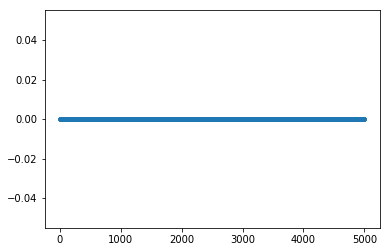

In [0]:
plt.plot(pred_new,'.')


In [0]:
temp=sample
temp['is_goal']=pred
temp.head()

,shot_id_number,is_goal
0,1,0.361617
1,8,0.311857
2,17,0.306248
3,20,0.347307
4,33,0.361567


In [0]:
temp.to_csv(r'result.csv')

# CNN


In [0]:
X_nn.shape

(24184, 6, 1)